# KNN Regression
Makes predictions by finding the K nearest data points to a given input and averaging their target values (for numerical regression) or selecting the majority class (for classification).A very good thing which KNN is used for is feature selection .But a lot of scaling down is required and thus knn is usually used for classification.Thus as a regg for R2 score is bad but for feture corealtion to the target on which regg would be applied is good 

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv(r"C:\Users\PRISHA\OneDrive\Desktop\SML datasets and files\diamonds.csv")

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 11)

In [6]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df_new=pd.get_dummies(df,drop_first=True)#new columns for categorical variables would be added which would be dummy columns for example 3 colurs thus three columns for per colour

In [9]:
df_new.shape

(53940, 24)

In [10]:
X=df_new.drop("price",axis=1)
Y=df_new['price']

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

## Data Scaling

In [13]:
Y_train=Y_train.to_numpy().reshape(-1,1) 
Y_test=Y_test.to_numpy().reshape(-1,1) 

In [14]:
scale_x = MinMaxScaler().fit(X_train) 
scale_y = MinMaxScaler().fit(Y_train)

In [15]:
X_train = scale_x.transform(X_train) 
Y_train= scale_y.transform(Y_train) 

In [16]:
Y_train = (Y_train).reshape(-1, 1)
Y_test = (Y_test).reshape(-1, 1)

# Apply MinMax Scaling
scale_x = MinMaxScaler().fit(X_train)
scale_y = MinMaxScaler().fit(Y_train)
X_train = scale_x.transform(X_train)
Y_train = scale_y.transform(Y_train)

# Apply Standard Scaling
scaler_x = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(Y_train)
X_train = scaler_x.transform(X_train)
Y_train = scaler_y.transform(Y_train)

When ever we have outliers dont use minmax scalar as it will interpreot regular walues as min and max eg : heartrate 
in that case we use std scaler,it transforms the data in such a way that mean is towards 1 and std dev is towards 0

## Model

In [19]:
para = {
    "n_neighbors": [3, 5, 7, 12],
    "weights": ['uniform', 'distance'],  # Added missing comma here
    "metric": ['minkowski', 'manhattan', 'euclidean']
}


In [20]:
# Perform Grid Search : it will take time cause it will have multiple permutations and combinations 
dia_reg = GridSearchCV(KNeighborsRegressor(), para, cv=10)

In [21]:
dia_reg.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 12],
                         'weights': ['uniform', 'distance']})

In [22]:
dia_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [23]:
from sklearn.neighbors import KNeighborsRegressor

# Define and initialize the KNeighborsRegressor model
reg = KNeighborsRegressor(metric='manhattan', n_neighbors=5, weights='distance')


In [24]:
reg.fit(X_train, Y_train.ravel())

KNeighborsRegressor(metric='manhattan', weights='distance')

In [25]:
import numpy as np

# Convert X_train and X_test to NumPy arrays (ensuring no feature names issue)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [26]:
# Make predictions
pred = reg.predict(X_test)


In [27]:
# Evaluation

In [28]:
r2_score(pred,Y_test)

-156913158.23455715

# ADVERTISEMENT DATASET

In [29]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [30]:
df=pd.read_csv(r"C:\Users\PRISHA\OneDrive\Desktop\SML datasets and files\Assignment 2 Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [31]:
dataset = df.iloc[: , 1:]#drop the sales column as well

In [32]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
x=dataset[['TV','Radio','Newspaper']]
y=dataset['Sales']

In [34]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [35]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
para = {"n_neighbors":np.arange(1,21,2),
        "weights": ['uniform', 'distance'],
        "metric": ['minkowski', 'manhattan', 'euclidean']
}

In [38]:
knn=KNeighborsRegressor()

In [39]:
knn_reg = GridSearchCV(KNeighborsRegressor(), para, cv=10)

In [40]:
knn_reg.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']})

In [41]:
knn_reg.best_score_

0.9072711355316011

In [42]:
knn_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [43]:
best_knn = KNeighborsRegressor(**knn_reg.best_params_)
best_knn.fit(x_train,y_train)

KNeighborsRegressor(metric='manhattan', weights='distance')

In [44]:
y_pred=best_knn.predict(x_test)

In [45]:
r2_score(y_pred,y_test)

0.9117528664240356

In [46]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Test RMSE: {rmse:.4f}")

Test RMSE: 1.6550


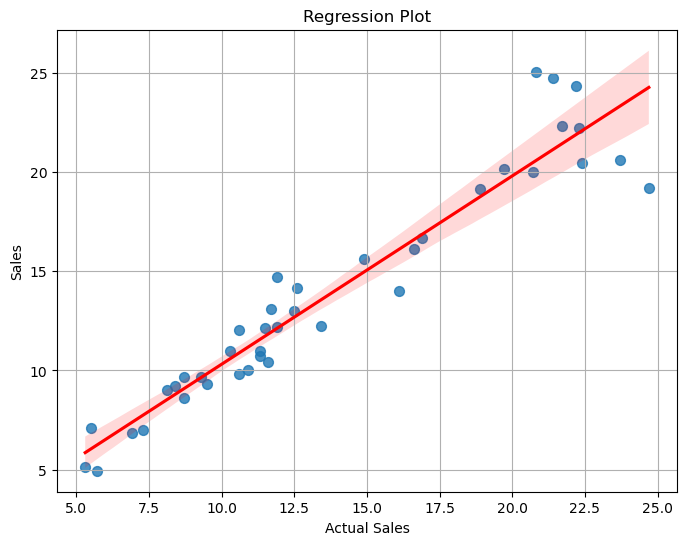

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Ensure y_test and y_pred are numeric
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s':50}, line_kws={"color":"red"})

# Define labels and title
plt.xlabel(x_label if 'x_label' in locals() else 'Actual Sales')
plt.ylabel('Sales')
plt.title(title if 'title' in locals() else 'Regression Plot')

plt.grid(True)
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
# Load dataset
file_path = "Practice dataset 1 KNN regression Hydropower_Consumption.csv"
df = pd.read_csv(file_path)

In [6]:
# Display first few rows
display(df.head())


,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,312,498,555,63,565,59,637,748,542,...,751,595,71,804,895,989,1025,105,105,107
1,Africa,75246,80864,85181,82873,87405,89066,92241,95341,97157,...,107427,110445,110952,117673,123727,115801,123816,130388,132735,0
2,Albania,4548,3519,3477,5117,5411,5319,4951,276,3759,...,7673,4036,4725,6959,4726,5866,7136,448,448,4018
3,Algeria,54,69,57,265,251,555,218,226,283,...,173,378,389,99,193,145,72,56,117,152
4,Angola,903,1007,1132,1229,1733,2197,2638,2472,3103,...,3666,3967,3734,4719,4991,5037,5757,7576,7576,8422


In [8]:
# Encode categorical variables
if 'Country' in df.columns:
    le = LabelEncoder()
    df['Country'] = le.fit_transform(df['Country'])


In [10]:
# Split features and target
X = df.drop(columns=['2019'])  # Predicting the year 2019
y = df['2019']

In [12]:

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# Train KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor()

In [18]:
# Predict and evaluate
y_pred = knn_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [20]:

# Display evaluation metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 3384.70
MSE: 46952944.68
RMSE: 6852.22


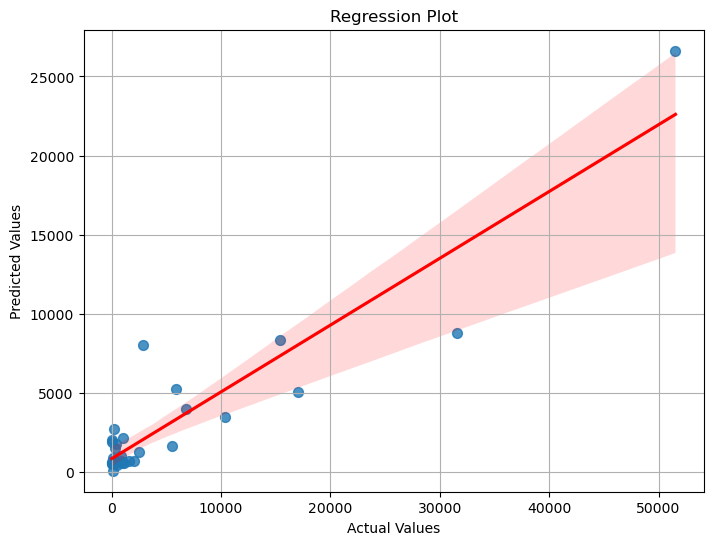

In [22]:
# Regression plot
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s':50}, line_kws={"color":"red"})

# Define labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot')
plt.grid(True)
plt.show()
